# 1. DEFINE

#### 1.1 Define the problem

In [2]:
# This problem aims at analyzing which group/category of people had higher chance of survial in the Titanic tragedy.
# With the given set of features/columns, the problem aims at establishing the factors that contributing in 
# deciding the fate of passengers.

# 2. DISCOVER

In [104]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

### 2.1 Obtain dataset

In [62]:
# Training dataset
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
# Testing dataset
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
# A point to be noted here is: the number of columns in train_data and test_data datasets are different. This is because the 
# train_data dataset consists of one extra column, namely 'Survived', which will be considered as the class/label for this
# dataset as per the problem definition.

# The return type of pd.read_csv() is a DataFrame. So, 'train_data' and 'test_data' are both dataframes.

In [65]:
# The dimension of the train_data dataset can be obtained as:
train_data.shape

(891, 12)

In [66]:
# This implies there are 891 entries/rows and a total of 12 columns in the dataset

In [67]:
# The dimension of test_data dataset can be obtained as:
test_data.shape

(418, 11)

In [68]:
# This implies that there are 418 entries/rows and a total of 11 columns in the dataset

Now we have two datasets. <br>
The 'train_data' consists of 891 entries and 12 columns (including the class label column 'Survived') <br>
The 'test_data' consists of 418 entries and 11 columns

### 2.2 Cleaning dataset

In order to preserve the original datasets we will create one replicas of each of the original dataset and make changes in those replicas instead of the original dataset.

In [141]:
# Copying original train_data and test_data in a new dataframe
train = train_data.copy()
test = test_data.copy()

### 2.2.1 First let's explore the columns in the datasets which do not contribute in our analysis and can be __dropped__.

In [142]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
# The columns 'PassengerId' and 'Name' does not hold relevance in deciding the survival of a passenger and hence can be dropped.
to_drop = ['PassengerId','Name']
train.drop(to_drop,axis = 1, inplace = True) 
# 'axis = 1' implies columns; 'inplace = True' implies that the change be made directly in the object 
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [144]:
# To maintain consistency in the datasets, the same process will be repeated for the test dataset
test.drop(to_drop, axis = 1, inplace = True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,3,male,27.0,0,0,315154,8.6625,NaN,S
4,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [145]:
# Checking for the datatypes of columns to ensure if we need to make any chnages in any column's datatype
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


The datatype listed for each column looks good enough and requires no change at the moment.

In [146]:
# Checking for the consistency in the column names
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [147]:
test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

All the column names seems consistant in the train and test dataset. By consistant here it means, the first letter of each column is consistant and capital and there is no hidden space in the names of the columns.


### Checking the frequency count of each column

### Traget variable : Survived
Description: whether the passenger survived or not <br>
0: did not survive <br>
1: survived

In [148]:
# Survived
train.Survived.value_counts(dropna = False)

0    549
1    342
Name: Survived, dtype: int64

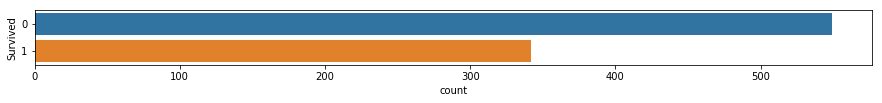

In [149]:
fig = plt.figure(figsize = (15,1))
sns.countplot(y = 'Survived', data = train)

__*So, a total of 549 passengers did not survive the Titanic tragedy.* __

### Feature : Pclass
Description: passenger class (a proxy of socio-economic status) <br>
1 : Upper class <br>
2 : Middle class <br>
3 : Lower class <br>

In [150]:
# Pclass
train.Pclass.value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

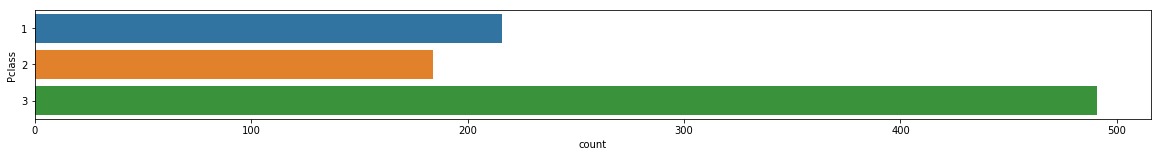

In [151]:
pclass_fig = plt.figure(figsize = (20,2))
sns.countplot(y = 'Pclass', data = train)

__*The maximum number of passengers on board were in class 3 followed by 1 and 2 respectively.*__

### Feature : Sex
Description : Sex of the passenger <br>
male : Male <br>
female : Female

In [152]:
# Sex
train.Sex.value_counts(dropna = False)

male      577
female    314
Name: Sex, dtype: int64

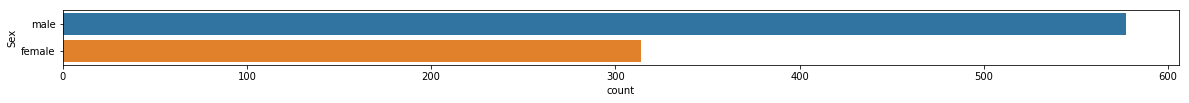

In [153]:
sex_fig = plt.figure(figsize = (20,1))
sns.countplot(y = 'Sex', data = train)

__*The number of male passengers are significantly more than female passengers*__

### Feature : Age
Decription : Age of the passenger <br>

In [154]:
# Age
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The average age pf people on board were about 29-30 years old (mean). <br>
The oldest person onboard was of age 80 and the youngest was a 4 months old baby.

### Feature: SibSp
Description : Number of siblings or spouse on board

In [155]:
# SibSp
train.SibSp.value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

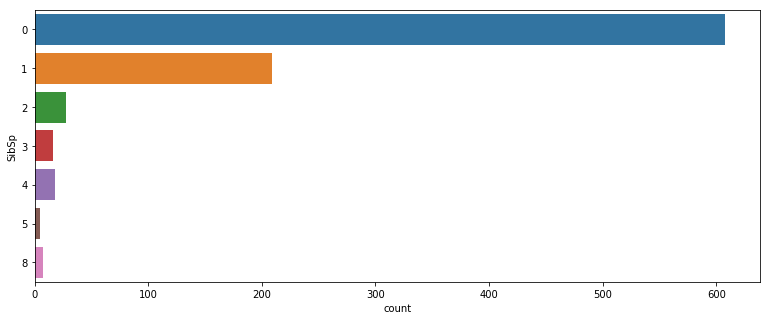

In [156]:
sibsp_fig = plt.figure(figsize = (13,5))
sns.countplot(y = 'SibSp', data = train)

The number of passengers who were travelling alone is quite high, i.e., there were about 608 passengers on board who did not
travel with either a spouse or a sibling with them.
One interesting thin to note here is, the count 5 for 5 SibSp implies that these 5 people might be related ot each other. Lets explore them to dig a little more deep.

In [157]:
train.loc[train['SibSp']== 5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,0,3,male,11.0,5,2,CA 2144,46.9,NaN,S
71,0,3,female,16.0,5,2,CA 2144,46.9,NaN,S
386,0,3,male,1.0,5,2,CA 2144,46.9,NaN,S
480,0,3,male,9.0,5,2,CA 2144,46.9,NaN,S
683,0,3,male,14.0,5,2,CA 2144,46.9,NaN,S


We can say that these 5 people are each other's siblings (kids as young as 1 year old and as old as 16 years old), with both their mother and father on board with them (Parch = 2, for all of them). They boarded the Titanic from Southampton (Emabrked = S). The eldest one was a sister and other four were the brothers (Sex = female, male). Unfortunately, none of the 5 siblings survived the disaster.

One more important point to note here is that we could deduce this information only because there were only 5 people on board with 5 siblings. If we try to check for other values of SibSp, we might not get the same insights.

In [158]:
train.loc[train['SibSp']== 8]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S
180,0,3,female,NaN,8,2,CA. 2343,69.55,NaN,S
201,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S
324,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S
792,0,3,female,NaN,8,2,CA. 2343,69.55,NaN,S
846,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S
863,0,3,female,NaN,8,2,CA. 2343,69.55,NaN,S


Here we can not say anything about the relation between the 8 passengers

In [159]:
# Let's check these 8 passengers with their names as well
train_data.loc[train_data['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


The only conclusion we can draw from the names is that all these 8 passengers might be related to each other as they have the same second name.

### Feature: Parch
Description : Number of parents or children onboard

In [160]:
# Prach
train.Parch.value_counts(dropna = False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

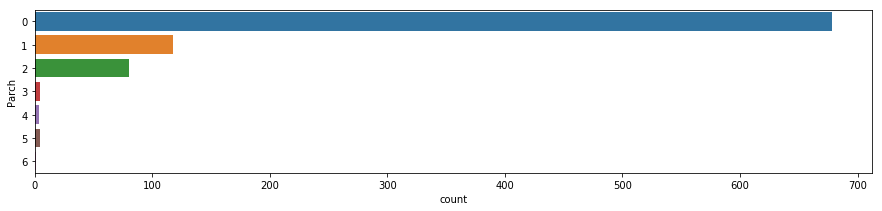

In [161]:
parch_fig = plt.figure(figsize = (15,3))
sns.countplot(y = 'Parch', data = train)

There are 678 people who are neither accompanied by their parents or children on Titanic.

In [162]:
len(train[(train['SibSp'] == 0) & (train['Parch'] == 0)])

537

So there are 537 passengers on board who are indivduals with no spouse, siblings, parent or children with them on board.

### Feature: Ticket
Description : Ticket number of the passenger

In [128]:
# Ticket
train.Ticket.value_counts(dropna = False)

1601               7
347082             7
CA. 2343           7
CA 2144            6
347088             6
3101295            6
382652             5
S.O.C. 14879       5
19950              4
W./C. 6608         4
347077             4
PC 17757           4
17421              4
349909             4
LINE               4
113781             4
2666               4
113760             4
4133               4
239853             3
PC 17572           3
230080             3
363291             3
110413             3
24160              3
13502              3
110152             3
PC 17755           3
SC/Paris 2123      3
F.C.C. 13529       3
                  ..
2926               1
243880             1
19972              1
349219             1
PC 17601           1
SOTON/OQ 392089    1
374746             1
248731             1
315082             1
2687               1
2695               1
3411               1
244361             1
349233             1
228414             1
14311              1
347085       

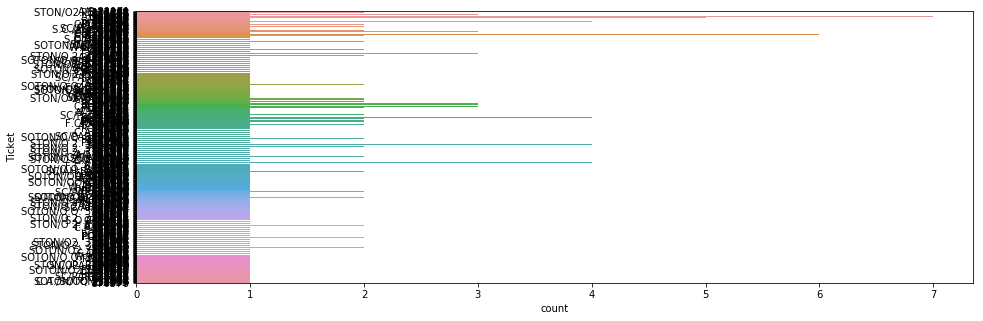

In [165]:
ticket_fig = plt.figure(figsize = (15,5))
sns.countplot(y = 'Ticket', data = train)

There are 681 types of tickets. <br>
This might not be a very useful feature in determining the survival status of a passenger.<br>
Like Name and PassengerID, we can drop this feature as well. 

### Feature: Fare
Description : Ticket cost of the passenger

In [86]:
# Fare
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

The maximum fare of Titanic was 512.32920. <br>

### Feature: Cabin
Description : Cabin number of the passenger

In [167]:
# Cabin
train.Cabin.value_counts(dropna = False)

NaN                687
G6                   4
B96 B98              4
C23 C25 C27          4
F2                   3
D                    3
F33                  3
C22 C26              3
E101                 3
E24                  2
E44                  2
B51 B53 B55          2
C123                 2
F4                   2
D35                  2
D17                  2
E67                  2
C78                  2
B58 B60              2
F G73                2
C93                  2
B20                  2
C92                  2
E8                   2
B57 B59 B63 B66      2
C83                  2
E33                  2
C126                 2
C125                 2
D26                  2
                  ... 
C90                  1
D46                  1
C110                 1
B101                 1
E38                  1
D28                  1
B71                  1
C99                  1
A31                  1
D21                  1
B80                  1
E58                  1
D56        

There are a total of 148 cabin types in Titanic. <br>
We can segregate these by deck where <br>
A - Boat Deck, <br>
B - Promenade Deck, <br>
C - Bridge Deck, <br>
D - Shelter Deck, <br>
E - Saloon Deck, <br>
F - Upper Deck, <br>
G - Middle Deck <br>

The first letter of the Cabin tells us about the deck on which the cabin is. So, making use of this information, we can split the cabin numbers from the deck and use that to identify which deck has more survival chances.
This is done because the frequency of each of 148 cabin types is either 1,2,3 or 4 which does not contribute in our analysis.

__*Assumptions used:*__ <br>
__1. Cabin entries like 'C23 C25 C27' will be replaced by 'C' assuming that the passenger belonged to deck C__ <br>
__2. Cabin entries like 'F G63' will be replaced by 'F' assuming the passenger belonged to deck F (This is based on the information provided online about Titanic that level G was used for storage and there were no cabins on that level of Titanic)__


In [168]:
cabins = train['Cabin'].str[0]
df = pd.DataFrame(cabins)
train.update(df)

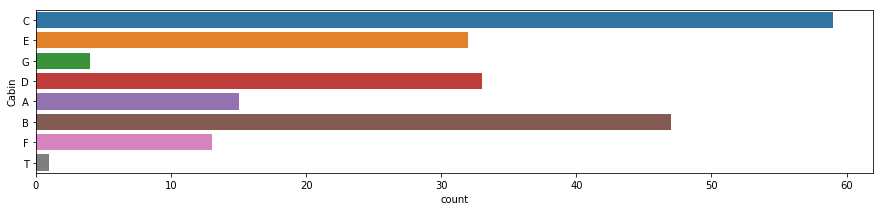

In [169]:
cabin_fig = plt.figure(figsize = (15,3))
sns.countplot(y = 'Cabin', data = train)

In [170]:
# Replicating the same in the test dataset to maintain consistency
cabin = test['Cabin'].str[0]
df_test = pd.DataFrame(cabin)
test.update(df_test)

### Feature: Embarked
Description : Port of embarkation of each passenger <br>
C : Cherbourg <br>
Q : Queenstown <br>
S : Southampton <br>
The first point of start for Titanic was Southampton followed  by Queenstown and then Cherbourg

In [171]:
# Embarked
train.Embarked.value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

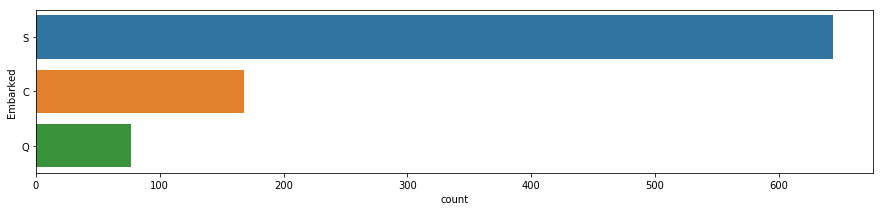

In [172]:
embarked_fig = plt.figure(figsize = (15,3))
sns.countplot(y = 'Embarked', data = train)

This shows  that maximum number of people boarded Titanic from Southampton, which was the starting point of the sail.<br>
We have 2 NaN values. 

#### Handling missing data

In [97]:
# First we check for missing values in the dataset
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

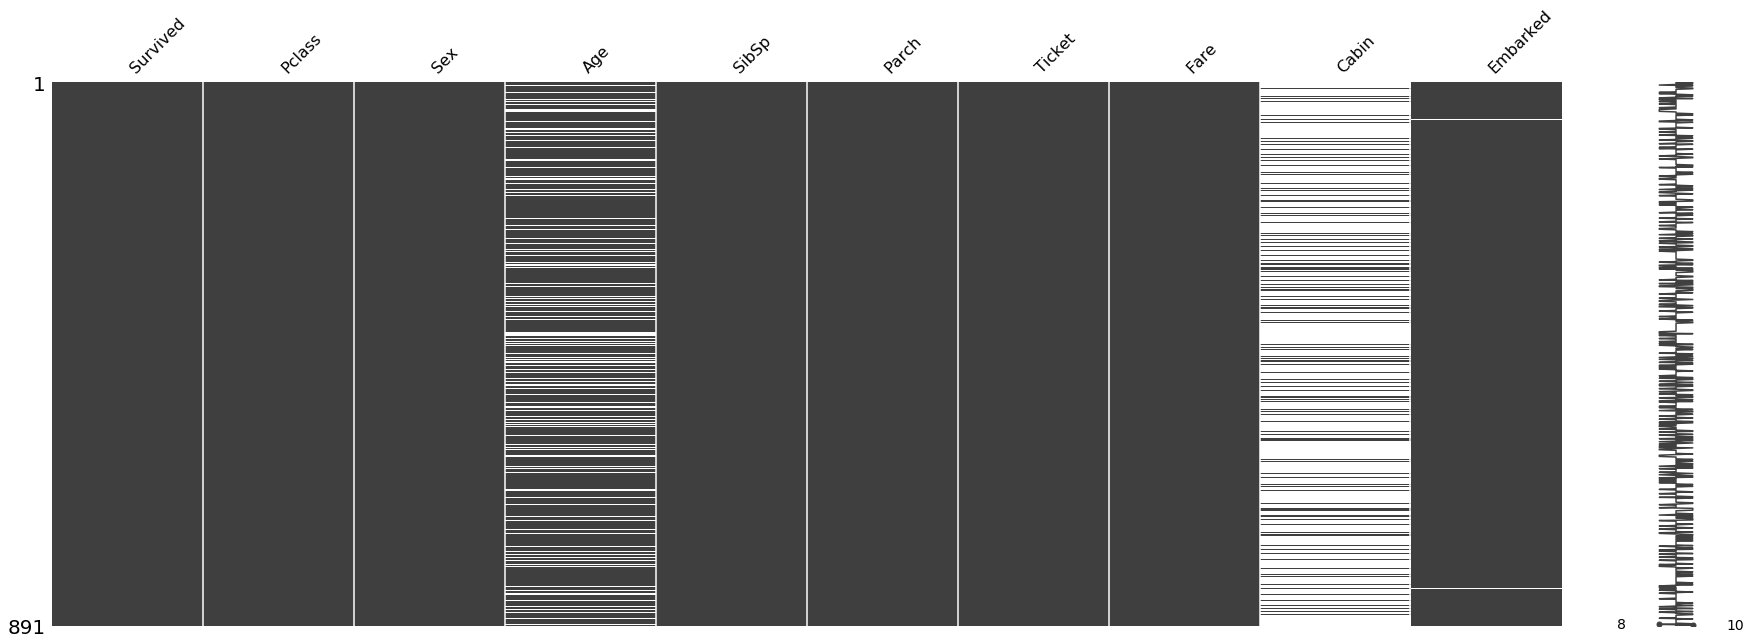

In [100]:
# Visually analysing the columns with missing values
missingno.matrix(train, figsize = (30,10))

Out of 12 columns, 3 columns consists of missing data <br>
Age : 177 missing values <br>
Cabin : 687 missing values <br>
Embarked : 2 missing values <br>
Column 'Cabin' consists of maximum number of null values

# REFERENCES:
https://realpython.com/python-data-cleaning-numpy-pandas/  <br>
http://www.titanicandco.com/inside.html
